In [3]:
import pandas as pd

Randomly selecting 20 posts for manually categorizing them

In [5]:
df = pd.read_csv("split_part3_utsav_with_metadata.csv")
sampled_df = df.sample(n=20, random_state=41)  # random_state for reproducibility
sampled_df.to_csv('random20.csv', index=False)

In [13]:

df = pd.read_csv("random20.csv")



def categorize_post(title, answer):
    text = f"{str(title).lower()} {str(answer).lower()}"

    # Step 1: Bigram/Trigram phrase-based rules
    phrase_rules = {
        "Implementation Issues": ["how to", "how do i", "can i use", "code for"],
        "Preprocessing Tasks": ["remove stopwords", "clean text", "text preprocessing"],
        "Task-specific Help": ["text classification", "named entity recognition", "topic modeling"],
        "Conceptual Questions": ["difference between", "what is", "define", "explain"],
        "Tool Setup/Errors": ["install spacy", "module not found", "version error"],
        "Data Wrangling": ["read csv", "load dataset", "convert to", "parse file"]
    }

    for category, phrases in phrase_rules.items():
        if any(phrase in text for phrase in phrases):
            return category

    # Step 2: Keyword-based fallback
    keyword_scores = {
        "Implementation Issues": ["code", "implement", "function", "run", "script", "use"],
        "Preprocessing Tasks": ["remove", "stopwords", "clean", "punctuation", "tokenize"],
        "Task-specific Help": ["classification", "translation", "clustering", "similarity"],
        "Conceptual Questions": ["difference", "meaning", "definition", "concept", "theory"],
        "Tool Setup/Errors": ["install", "error", "version", "setup", "path", "module"],
        "Data Wrangling": ["read", "convert", "csv", "json", "dataframe", "load"]
    }

    scores = {category: 0 for category in keyword_scores}

    for category, keywords in keyword_scores.items():
        scores[category] = sum(1 for word in keywords if word in text)

    best_match = max(scores, key=scores.get)
    return best_match if scores[best_match] > 0 else "Uncategorized"



df["category"] = df.apply(lambda row: categorize_post(row["title"], row["accepted_answer_body"]), axis=1)

df.to_csv("random20_categorized.csv", index=False)

df["category"] = df.apply(lambda row: categorize_post(row["title"], row["accepted_answer_body"]), axis=1)
df.to_csv("random20_categorized.csv", index=False)


In [19]:
df=pd.read_csv("random20_categorized.csv")
df.head(2)

,question_id,title,body,tags,accepted_answer_id,accepted_answer_body,link,tag,creation_date,view_count,score,answer_count,is_answered,last_activity_date,last_edit_date,category
0,61826824,can you train a bert model from scratch with t...,bert pre-training of the base-model is done by...,"['machine-learning', 'nlp', 'bert-language-mod...",61839719,"bert can be viewed as a language encoder, whic...",https://stackoverflow.com/questions/61826824,machine-learning,15-05-2020 19:21,6813.0,6.0,2.0,True,01-02-2024 15:10,01-02-2024 15:10,Implementation Issues
1,52047163,use natural language processing to to split ba...,"so bit of a long shot here, and i apologize fo...","['python', 'nlp', 'nltk']",52056089,you need sentiment analysis. i don't think you...,https://stackoverflow.com/questions/52047163,python,27-08-2018 21:23,384.0,0.0,3.0,True,20-09-2024 11:43,29-08-2018 07:23,Implementation Issues


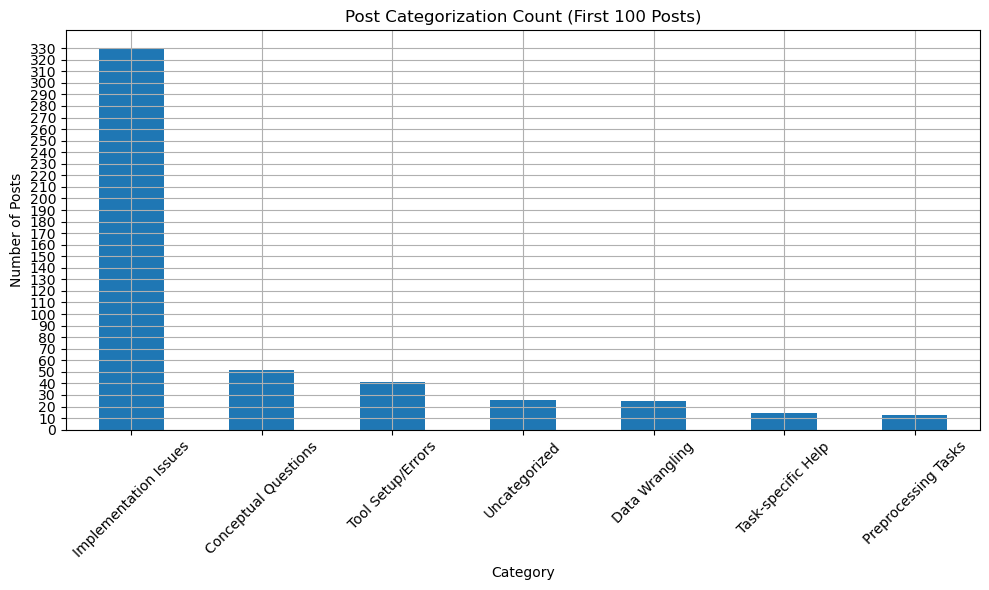

In [17]:
import matplotlib.pyplot as plt

# Load first 100 rows
df = pd.read_csv("split_part3_utsav_with_metadata.csv").head(500)

# Apply categorization
df["category"] = df.apply(lambda row: categorize_post(row["title"], row["accepted_answer_body"]), axis=1)

# Save to new file
df.to_csv("split_part3_utsav_with_metadata_categorized.csv", index=False)

# Plot the distribution
category_counts = df["category"].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title("Post Categorization Count (First 100 Posts)")
plt.xlabel("Category")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.yticks(range(0, category_counts.max() + 5, 10))  # <-- Set y-axis ticks at 5 step
plt.tight_layout()
plt.grid(True)
plt.show()
